In [1]:
%load_ext autoreload
%autoreload 2
%pip install "pypsa[gurobi]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pypsa

/Users/marcoul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
from add_country import *

In [4]:
import pypsa
import pandas as pd
from dataclasses import dataclass

In [5]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [6]:
add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

In [7]:
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
scandinaviaGas,Scandinavia,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaBioEnergies,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaHydroelectric,Scandinavia,PQ,,57000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_on_shore,Scandinavia,PQ,,43000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_off_shore,Scandinavia,PQ,,17000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaNuclear,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,24,24,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaSolar,Scandinavia,PQ,,19000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaFailure,Scandinavia,PQ,,100000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
GER-Hydro_ROR,Germany,PQ,,3933.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [8]:
network

PyPSA Network
Components:
 - Bus: 5
 - Carrier: 19
 - Generator: 44
 - Load: 9
 - StorageUnit: 6
 - Store: 11
Snapshots: 8760

In [9]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)

In [10]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-21


Writing continuous variables.: 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]


Read LP format model from file /private/var/folders/9r/0dm0pnsj7hz060lltl_d45_h0000gn/T/linopy-problem-6ozflb0x.lp
Reading time = 4.35 seconds
obj: 1664400 rows, 832200 columns, 2741863 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1664400 rows, 832200 columns and 2741863 nonzeros
Model fingerprint: 0xb2cd74e0
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [1e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+06]
Presolve removed 1576477 rows and 486470 columns
Presolve time: 2.98s
Presolved: 87923 rows, 345730 columns, 540513 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 1.236e+05
 Factor NZ  : 1.170e+06 (roughly 200 MB of memory)
 Factor Ops : 1.808e+07 (le

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 832200 primals, 1664400 duals
Objective: 5.22e+10
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

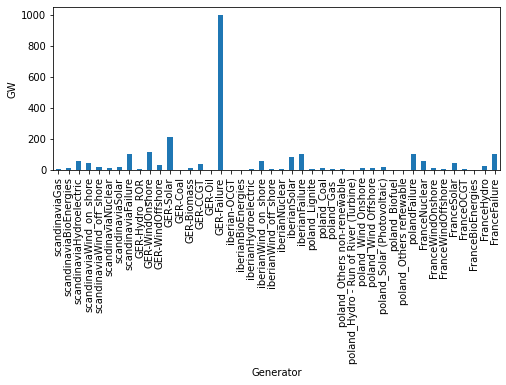

In [11]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

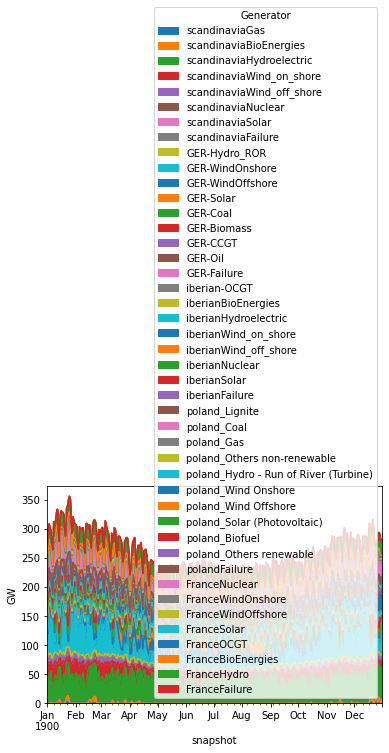

In [14]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
#network.generators_t.p['GER-Underproduction'] = network.generators_t.p['GER-Underproduction'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).clip(0,1000).plot.area(subplots=False, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes:

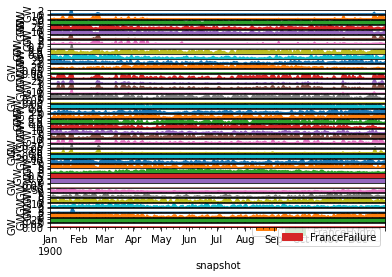

In [15]:
network.generators_t.p.resample('D').mean().div(1e3).clip(0,1000).plot.area(subplots=True, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>], dtype=object)

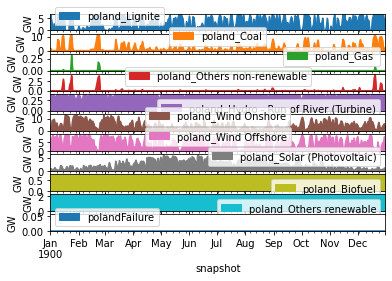

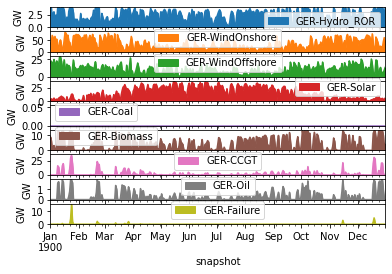

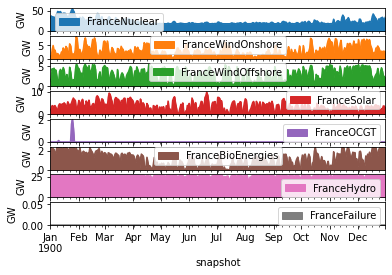

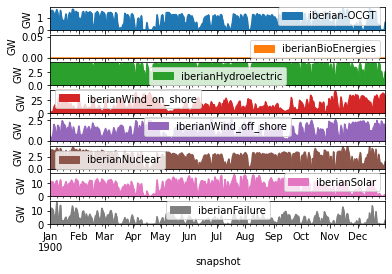

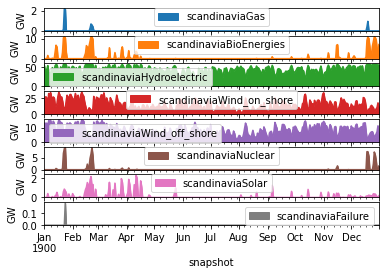

In [16]:
country = "poland"
keepcol = [x for x in network.generators_t.p.columns if x.find(country)==0]
network.generators_t.p[keepcol].resample('D').mean().div(1e3).plot.area(subplots=True, ylabel="GW")

country = "GER"
keepcol = [x for x in network.generators_t.p.columns if x.find(country)==0]
network.generators_t.p[keepcol].resample('D').mean().div(1e3).clip(0,100).plot.area(subplots=True, ylabel="GW")

country = "France"
keepcol = [x for x in network.generators_t.p.columns if x.find(country)==0]
network.generators_t.p[keepcol].resample('D').mean().div(1e3).plot.area(subplots=True, ylabel="GW")

country = "iberian"
keepcol = [x for x in network.generators_t.p.columns if x.find(country)==0]
network.generators_t.p[keepcol].resample('D').mean().div(1e3).plot.area(subplots=True, ylabel="GW")

country = "scandinavia"
keepcol = [x for x in network.generators_t.p.columns if x.find(country)==0]
network.generators_t.p[keepcol].resample('D').mean().div(1e3).plot.area(subplots=True, ylabel="GW")


In [17]:
tab_failure = network.generators_t.p[[x for x in network.generators_t.p.columns if x.lower().find("fail")>0]]
tab_failure[tab_failure>0].count()
tab_failure

Generator,scandinaviaFailure,GER-Failure,iberianFailure,polandFailure,FranceFailure
snapshot,,,,,
1900-01-01 00:00:00,0.0,0.0,7824.48,0.0,0.0
1900-01-01 01:00:00,0.0,0.0,6298.61,0.0,0.0
1900-01-01 02:00:00,0.0,0.0,5516.36,0.0,0.0
1900-01-01 03:00:00,0.0,0.0,4423.13,0.0,0.0
1900-01-01 04:00:00,0.0,0.0,3200.82,0.0,0.0
...,...,...,...,...,...
1900-12-31 19:00:00,0.0,0.0,12067.60,0.0,0.0
1900-12-31 20:00:00,0.0,0.0,13214.19,0.0,0.0
1900-12-31 21:00:00,0.0,0.0,12458.55,0.0,0.0


<Axes: xlabel='snapshot', ylabel='GW'>

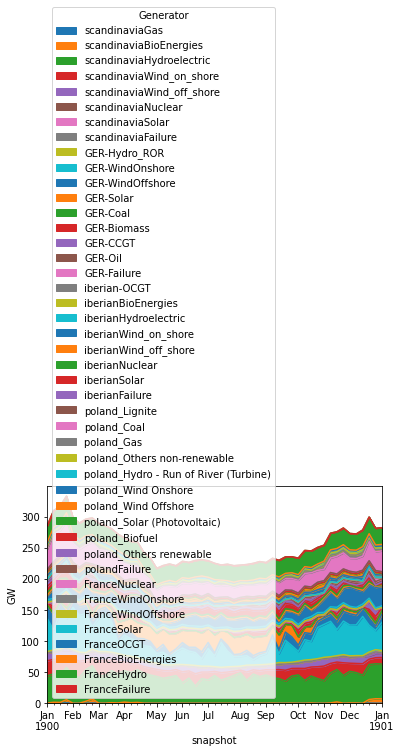

In [18]:
network.generators_t.p.div(1e3).resample('W').mean().plot.area(subplots=False, ylabel="GW", stacked=True)

<Axes: xlabel='snapshot', ylabel='GW'>

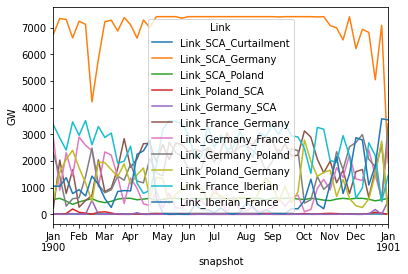

In [19]:
network.links_t.p0.resample("W").mean().plot.line(subplots=False, ylabel="GW", stacked=False)

<Axes: xlabel='snapshot', ylabel='GW'>

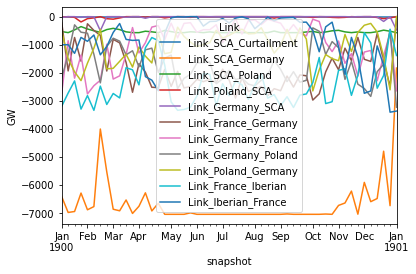

In [20]:
network.links_t.p1.resample("W").mean().plot.line(subplots=False, ylabel="GW", stacked=False)

In [21]:
tab_max_capa = network.generators_t.p_max_pu.copy()
for asset in tab_max_capa.columns:
    tab_max_capa[asset] = tab_max_capa[asset] * network.generators['p_nom'].loc[asset]

<Axes: xlabel='snapshot', ylabel='GW'>

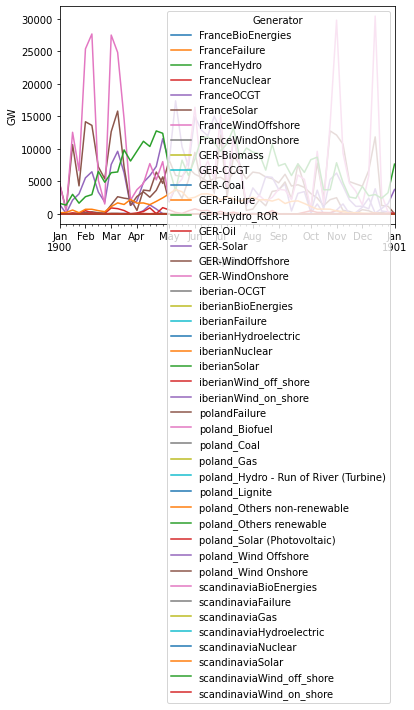

In [22]:
tab_curtail = tab_max_capa - network.generators_t.p

tab_curtail.resample("W").mean().plot.line(subplots=False, ylabel="GW", stacked=False)

In [23]:
tab_curtail_tot = tab_curtail.sum()

In [24]:
tab_curtail_tot[tab_curtail_tot>0]/1000000



Generator
FranceSolar                    2.807567e+01
FranceWindOffshore             4.018830e-17
FranceWindOnshore              2.157776e-16
GER-Solar                      4.660575e+01
GER-WindOffshore               4.964628e+01
GER-WindOnshore                7.071396e+01
iberianSolar                   6.056439e+01
iberianWind_off_shore          5.618640e-02
iberianWind_on_shore           2.189233e+00
poland_Solar (Photovoltaic)    1.938945e+00
poland_Wind Offshore           5.962148e-02
poland_Wind Onshore            8.606995e-02
scandinaviaSolar               1.282859e+01
scandinaviaWind_on_shore       7.439667e-16
dtype: float64

In [25]:
network.carriers

attribute,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
Coal,0.760,,,inf,0.0
Gas,0.370,,,inf,0.0
Oil,0.406,,,inf,0.0
Uranium,0.000,,,inf,0.0
Solar,0.000,,,inf,0.0
Wind,0.000,,,inf,0.0
Hydro,0.000,,,inf,0.0
Biomass,0.000,,,inf,0.0
Battery,0.000,,,inf,0.0


In [26]:
# Calcul intensité carbone
tab_carbon = network.generators_t.p.copy()
for asset in tab_carbon.columns:
    if network.generators.carrier[asset] in network.carriers.index:
        tab_carbon[asset] = tab_carbon[asset] / network.generators['efficiency'].loc[asset] * network.carriers.loc[network.generators.carrier[asset],'co2_emissions']
emissions = tab_carbon.sum(axis=1)
emissions

snapshot
1900-01-01 00:00:00    36154.6410
1900-01-01 01:00:00    36210.3894
1900-01-01 02:00:00    36040.9762
1900-01-01 03:00:00    36514.8050
1900-01-01 04:00:00    36530.6354
                          ...    
1900-12-31 19:00:00    51170.1490
1900-12-31 20:00:00    48939.4510
1900-12-31 21:00:00    43715.4750
1900-12-31 22:00:00    39438.0510
1900-12-31 23:00:00    35685.7750
Length: 8760, dtype: float64

<Axes: title={'center': 'Carbon intensity'}, xlabel='snapshot', ylabel='g CO2/kWh'>

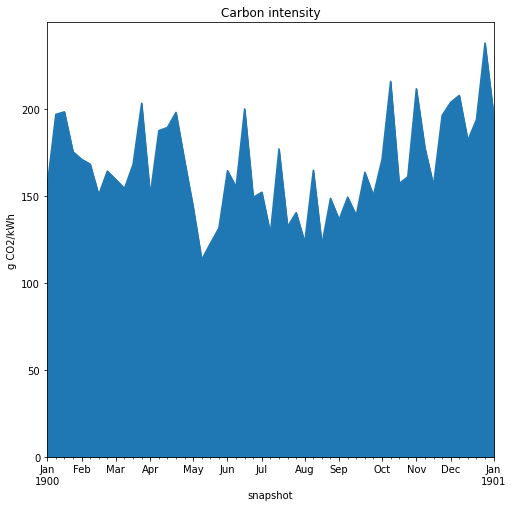

In [27]:
intensitéCO2 = (1/network.loads_t.p.sum(axis=1)).mul(emissions, axis=0)
intensitéCO2.resample('1W').mean().mul(1e3).plot.area(figsize=(8,8), ylabel="g CO2/kWh", title="Carbon intensity")

In [28]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
scandinavia-load,Scandinavia,AC,,0.0,0.0,-1.0
scandinaviaCurtailment-load,Curtailment,AC,,10000.0,0.0,-1.0
Germany-load,Germany,AC,,0.0,0.0,-1.0
Iberian_Peninsula-load,Iberian_Peninsula,AC,,0.0,0.0,-1.0
iberianCurtailment-load,Curtailment,AC,,10000.0,0.0,-1.0
poland-load,poland,AC,,0.0,0.0,-1.0
polandCurtailment-load,Curtailment,AC,,10000.0,0.0,-1.0
France-load,France,AC,,0.0,0.0,-1.0
FranceCurtailment-load,Curtailment,AC,,10000.0,0.0,-1.0


In [29]:
import matplotlib.pyplot as plt

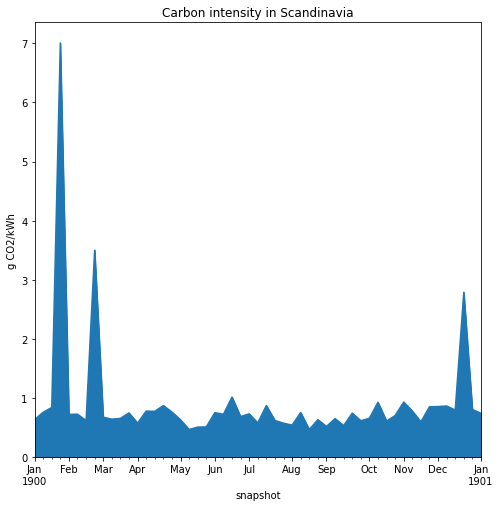

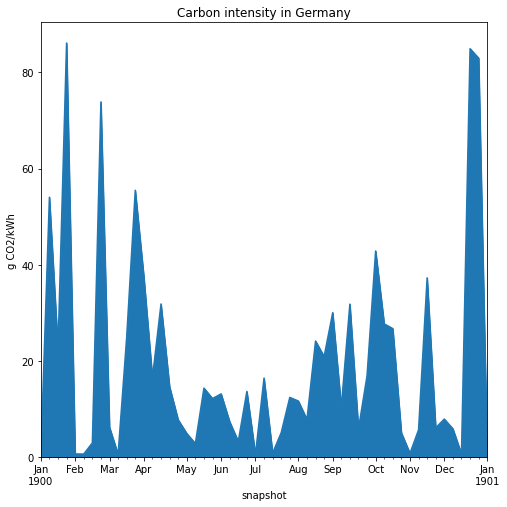

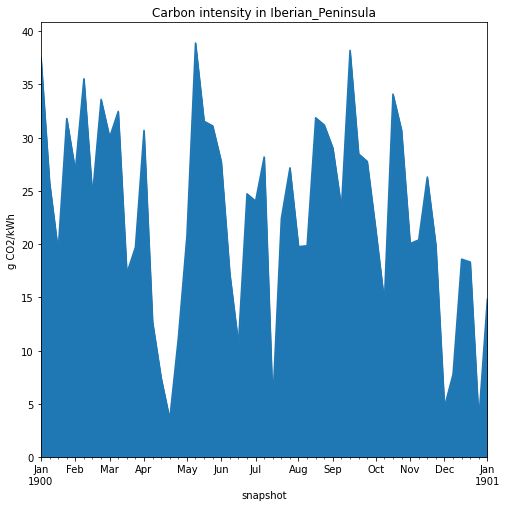

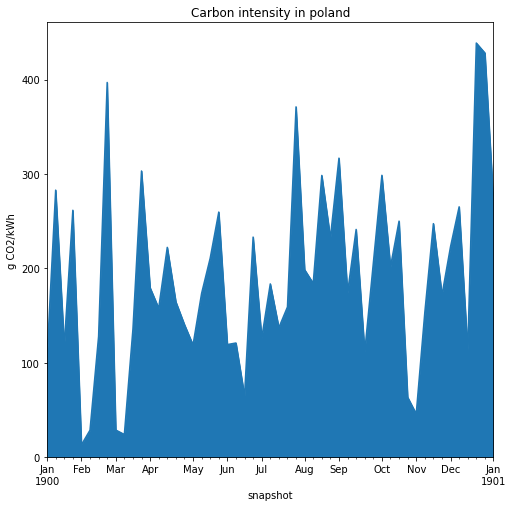

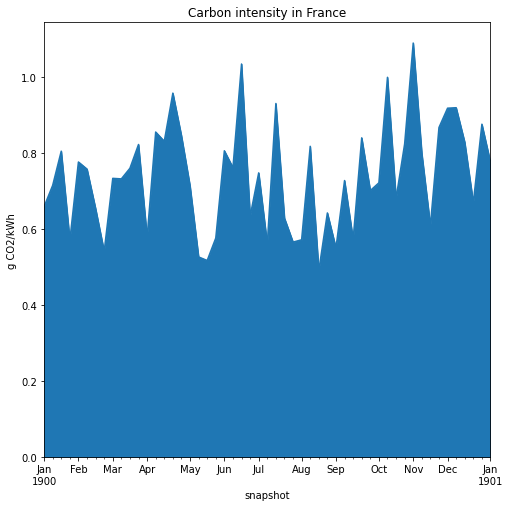

In [30]:
# calcul intensité carbone par pays
for pays in network.generators.bus.unique():
    tab_carbon = network.generators_t.p.copy()
    for asset in tab_carbon.columns:
        if network.generators.carrier[asset] in network.carriers.index:
            if network.generators.bus[asset] == pays:
                tab_carbon[asset] = (tab_carbon[asset] / network.generators['efficiency'].loc[asset]) * network.carriers.loc[network.generators.carrier[asset],'co2_emissions']*1e3
            else :
                tab_carbon.drop(columns=asset, inplace=True)
    emissions = tab_carbon.sum(axis=1)
    for load in network.loads.index:
        if network.loads.bus[load] == pays:
            break
    intensitéCO2 = (1/network.loads_t.p[load]).mul(emissions, axis=0)
    intensitéCO2.resample('1W').mean().mul(1).plot.area(figsize=(8,8), ylabel="g CO2/kWh", title="Carbon intensity")
    plt.title(f"Carbon intensity in {pays}")
    plt.show()

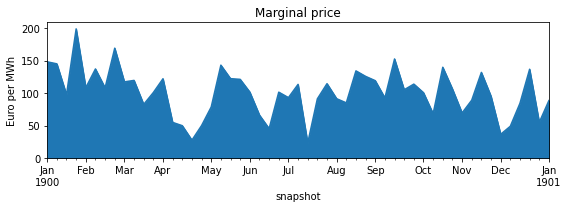

In [37]:
#Afficher les prix marginaux 
network.buses_t.marginal_price.mean(1).clip(-10,400).resample('1W').mean().plot.area(figsize=(8, 3), ylabel="Euro per MWh", title="Marginal price")
plt.tight_layout()

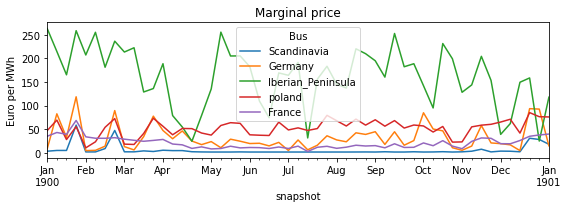

In [40]:
#Afficher les prix marginaux 
network.buses_t.marginal_price.clip(-10,400).resample('1W').mean().plot(figsize=(8, 3), ylabel="Euro per MWh", title="Marginal price")
plt.tight_layout()

In [ ]:
#Afficher les prix marginaux 
network.buses_t.marginal_price.clip(-10,400).resample('1W').mean().plot(figsize=(8, 3), ylabel="Euro per MWh", title="Marginal price")
plt.tight_layout()